<a href="https://colab.research.google.com/github/jandroi/3_2_BD/blob/main/Evaluated_Exercise_II_B_s0572034.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluated Exercise Part 2 – SciKit-Stack and Deep Learning**

## Task 4: Deep Learning – Run a Deep Learning Model: Build a Loan Amount Calculator using Multiple Linear Regression [10%]

Use the diamonds dataset from Task 3 to perform a Deep Learning (Regression) model. Target variable is again price.

Please describe all steps. Parameters to evaluate are MAE and MAPE. Please report results for test and training dataset! Packages: Tensorflow and Keras

-----

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
# Data Preparation 
from keras.utils import to_categorical
# StandardScaler
from sklearn.preprocessing import StandardScaler
### Train / Test Split
from sklearn.model_selection import train_test_split

## 
from keras.layers import Dense
from keras.models import Sequential


In [3]:
# Data import

url="https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv"
df =pd.read_csv(url)

## Data Understanding

*Same as Exercise II A*


https://colab.research.google.com/drive/1jLPeK0Fdru6QMtOpkd0cbmJ2t5qxeNvu?authuser=3#scrollTo=uEbqLh33Kp8e&line=3&uniqifier=1

## Data Preparation 
  (please change the order of the tasks as needed)

- Missing Values
- Transformation of all categorical variables
- Split into Test and Training Dataset
- Standardization
- …

### L

In [4]:
# First we remove Depth and Table which have no direct correlation

df = df.drop(['depth','table'], axis = 1)
df.head()

# There are some missing values for the dimensinos x y z
# We are dropping these observations since there can be a dimension of 0 but not 3 of them

x = list(df[(df['x']==0) & (df['y']==0) & (df['z']==0)].index)
x

# Exclude them from dataframe
df = df[~df.index.isin(x)]

In [5]:


# Transforming categorical variables: 
cut_df = pd.get_dummies(df['cut'], prefix='cut')
color_df = pd.get_dummies(df['color'], prefix='color')
clarity_df = cut_df = pd.get_dummies(df['clarity'], prefix='clarity')

df_metric = df.drop(['cut', 'color','clarity'], axis=1) 

df_metric = pd.concat([df_metric, cut_df, color_df, clarity_df], axis =1)
df_metric.head()



,carat,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,326,3.95,3.98,2.43,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,327,4.05,4.07,2.31,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,335,4.34,4.35,2.75,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [6]:
# Train test split
#X = df.drop('price', axis=1)
X= df_metric.drop(['price'], axis=1).values
y = df_metric['price'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.7, random_state=42)

In [8]:
# Scaling Variables
sc = StandardScaler()
sc.fit(X_train,y_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)


## Modeling
- Run a simple Multiple Linear Regression Model using Tensorflow/Keras!
- Run a Multiple Linear Regression Deep Learning Model (experiment with a few layers) using Tensorflow/Keras!

### Simple Multiple Linear Regression

In [9]:
n_cols = X_train.shape[1]

In [10]:
model = Sequential()

model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))

# One output layer
model.add(Dense(1, activation = 'relu'))

In [11]:
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=['mae','mape'])

In [12]:
model.fit(X_train_sc, y_train,epochs = 20, batch_size = 128)

Epoch 1/20
295/295 [==============================] - 1s 1ms/step - loss: 31490104.9662 - mae: 3925.6165 - mape: 99.7647
Epoch 2/20
295/295 [==============================] - 0s 1ms/step - loss: 31301513.3919 - mae: 3924.1072 - mape: 98.5319
Epoch 3/20
295/295 [==============================] - 0s 1ms/step - loss: 29675408.6149 - mae: 3813.8350 - mape: 96.3172
Epoch 4/20
295/295 [==============================] - 0s 1ms/step - loss: 27543640.2162 - mae: 3655.6361 - mape: 92.8974
Epoch 5/20
295/295 [==============================] - 0s 1ms/step - loss: 25022036.0608 - mae: 3458.3136 - mape: 88.4401
Epoch 6/20
295/295 [==============================] - 0s 1ms/step - loss: 22574478.0608 - mae: 3251.4104 - mape: 82.8586
Epoch 7/20
295/295 [==============================] - 0s 1ms/step - loss: 19440069.7500 - mae: 2973.4166 - mape: 76.7833
Epoch 8/20
295/295 [==============================] - 0s 1ms/step - loss: 16301687.8446 - mae: 2664.6207 - mape: 70.0074
Epoch 9/20
295/295 [============

In [13]:
y_pred = model.predict(X_test_sc)

In [14]:
score = model.evaluate(X_test_sc,y_test, batch_size=32)

506/506 [==============================] - 1s 1ms/step - loss: 1949362.3750 - mae: 767.7689 - mape: 34.1013


### Multiple Regression


In [15]:
model = Sequential()

model.add(Dense(500, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))

# One output layer
model.add(Dense(1, activation = 'relu'))

In [16]:
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=['mae','mape'])
model.fit(X_train_sc, y_train,epochs = 20, batch_size = 128)

Epoch 1/20
295/295 [==============================] - 3s 7ms/step - loss: 10908462.9772 - mae: 1782.1452 - mape: 50.2768
Epoch 2/20
295/295 [==============================] - 2s 7ms/step - loss: 1313323.2941 - mae: 422.2266 - mape: 11.6057
Epoch 3/20
295/295 [==============================] - 2s 7ms/step - loss: 583085.8802 - mae: 382.4849 - mape: 10.8194
Epoch 4/20
295/295 [==============================] - 2s 8ms/step - loss: 910888.1231 - mae: 377.1224 - mape: 10.5668
Epoch 5/20
295/295 [==============================] - 2s 7ms/step - loss: 960674.1301 - mae: 375.8295 - mape: 10.4703
Epoch 6/20
295/295 [==============================] - 2s 7ms/step - loss: 529580.9118 - mae: 361.1049 - mape: 10.2057
Epoch 7/20
295/295 [==============================] - 2s 7ms/step - loss: 481151.3357 - mae: 362.6094 - mape: 10.1240
Epoch 8/20
295/295 [==============================] - 2s 7ms/step - loss: 669968.1821 - mae: 359.7637 - mape: 9.9457
Epoch 9/20
295/295 [==============================] -

In [17]:
y_pred = model.predict(X_test_sc)

In [18]:
score = model.evaluate(X_test_sc,y_test, batch_size=32)

506/506 [==============================] - 1s 1ms/step - loss: 542628.1250 - mae: 336.3937 - mape: 9.9619


In [29]:
residuals = y_test.reshape(-1,1) - y_pred
residuals = residuals.reshape(-1,1)
y_pred = y_pred.reshape(-1,1)
scaler = StandardScaler()
Z_res = scaler.fit_transform(residuals)
Z_y_pred = scaler.fit_transform(y_pred)

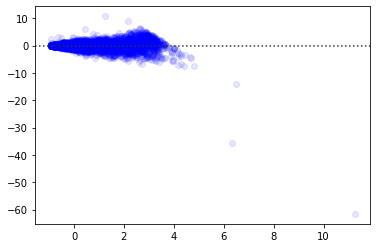

In [30]:
sns.residplot(x=Z_y_pred, y=Z_res, scatter_kws={'alpha':0.1} ,color="b")